In [1]:
%run -m celldom.nb.logging
%matplotlib inline
import pandas as pd
import plotnine as pn
import matplotlib.pyplot as plt
from celldom.core import experiment
from celldom.core import cytometry
from celldom.execute import view

In [3]:
config_path = "/lab/repos/celldom/config/experiment/exp-20181013-G1v2-K562-imatinib.yaml"
data_dir = "/lab/data/celldom/output/20181128-G1v2-full"
exp = experiment.Experiment(config_path, data_dir).build_views()

In [8]:
df_apt = exp.get_view_store().get('apartment')
df_apt['array'] = df_apt[exp.config.experimental_condition_fields].apply(':'.join, axis=1)
df_apt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22705 entries, 0 to 22704
Data columns (total 35 columns):
acq_apartment             22705 non-null object
acq_cell_line             22705 non-null object
acq_color                 22705 non-null object
acq_concentration         22705 non-null object
acq_condition             22705 non-null object
acq_datetime              22705 non-null datetime64[ns]
acq_drug                  22705 non-null object
acq_hour                  22705 non-null object
acq_id                    22705 non-null object
acq_processed_at          22705 non-null datetime64[ns]
acq_street                22705 non-null object
apt_id                    22705 non-null int64
apt_image_height          22705 non-null int64
apt_image_width           22705 non-null int64
apt_num                   22705 non-null object
apt_num_digit_scores      22705 non-null object
cell_count                22705 non-null float64
focus_score               22705 non-null int64
marker_center_

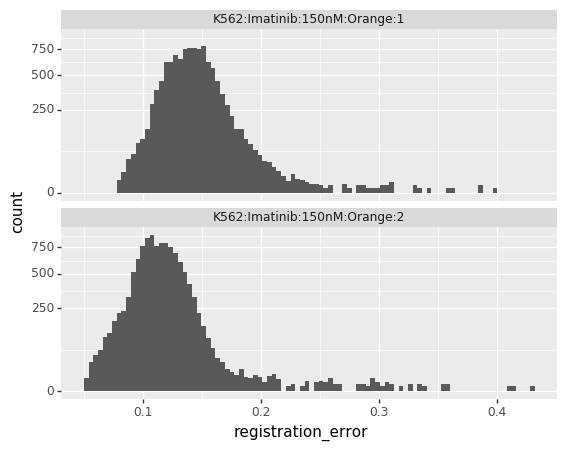

<ggplot: (-9223363309314342361)>

In [13]:
(
    pn.ggplot(df_apt, pn.aes(x='registration_error')) + 
    pn.geom_histogram(bins=96) + 
    pn.scale_y_sqrt() +
    pn.facet_wrap('~array', ncol=1)
)

In [66]:
df_apt['registration_error'].describe()

count    22705.000000
mean         0.128412
std          0.028761
min          0.050830
25%          0.109314
50%          0.126630
75%          0.145110
max          0.428989
Name: registration_error, dtype: float64

In [85]:
# Get one apartment based on registration error filter
apt = df_apt.query('array == "K562:Imatinib:150nM:Orange:1" & registration_error < .25')\
    .sort_values('registration_error', ascending=False)\
    .filter(regex='acq_|registration_error|apt_id').iloc[0]
apt

acq_apartment                                      028
acq_cell_line                                     K562
acq_color                                       Orange
acq_concentration                                150nM
acq_condition                                        1
acq_datetime                       2018-10-18 18:22:00
acq_drug                                      Imatinib
acq_hour                                           120
acq_id                1957f4848aa5045c085d437e46662b33
acq_processed_at                   2018-11-29 16:17:42
acq_street                                         016
apt_id                                               7
registration_error                            0.249088
acq_datetime_group                 2018-10-18 18:19:00
Name: 3557, dtype: object

In [86]:
df_acq = exp.get_view_store().get('acquisition')
df_acq.query('acq_id == "' + apt['acq_id'] + '"').iloc[0]

acq_apartment                                                           028
acq_cell_line                                                          K562
acq_color                                                            Orange
acq_concentration                                                     150nM
acq_condition                                                             1
acq_datetime                                            2018-10-18 18:22:00
acq_drug                                                           Imatinib
acq_hour                                                                120
acq_id                                     1957f4848aa5045c085d437e46662b33
acq_processed_at                                        2018-11-29 16:17:42
acq_street                                                              016
apt_count                                                                10
raw_image_path            /lab/data/celldom/dataset/dataset08/2018-10-13...
raw_image_sh

apartment/acq_id_1957f4848aa5045c085d437e46662b33/apt_id_7


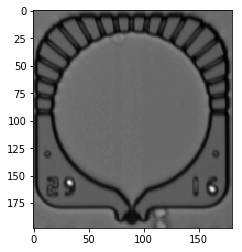

In [87]:
images = exp.get_image_store()
key = cytometry.get_image_key('apartment', 'apt_image', apt.to_dict())
print(key)
img = images.load_image(key)
plt.gray()
plt.imshow(img)